<a href="https://colab.research.google.com/github/Sravani-05/Clustering-assignment/blob/main/K_Means_algorithm_using_Python_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

**1. Reading Dataset**

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Catchup - quiz/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Apply Scatter plot to visualize after reading data to check each row


Text(0, 0.5, 'CustomerID')

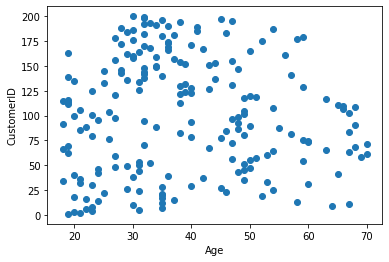

In [31]:
plt.scatter(df.Age,df['CustomerID'])
plt.xlabel('Age')
plt.ylabel('CustomerID')

**Encode Categorical Values**

In [32]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','CustomerID']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [34]:
df['cluster']=y_predicted
df.head()
     

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,2,19,15,39,2
1,2,2,21,15,81,2
2,3,2,20,16,6,2
3,4,2,23,16,77,2
4,5,2,31,17,40,2


In [35]:
km.cluster_centers_


array([[ 43.23529412,  97.45588235],
       [ 36.08695652, 166.        ],
       [ 37.14285714,  32.04761905]])

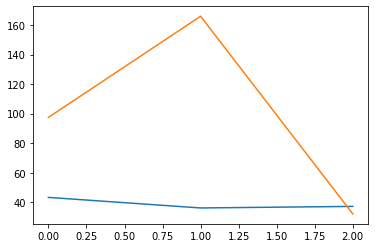

In [36]:
plt.plot(km.cluster_centers_)

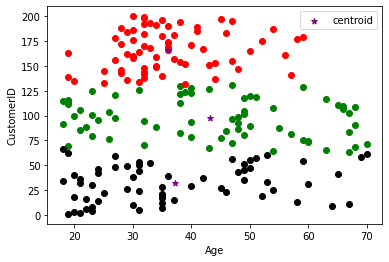

In [39]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['CustomerID'],color='green')
plt.scatter(df2.Age,df2['CustomerID'],color='red')
plt.scatter(df3.Age,df3['CustomerID'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('CustomerID')
plt.legend()

**Preprocessing using min max scaler**

In [40]:
scaler = MinMaxScaler()

scaler.fit(df[['CustomerID']])
df['CustomerID'] = scaler.transform(df[['CustomerID']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [41]:

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,2,0.019231,15,39,2
1,0.005025,2,0.057692,15,81,2
2,0.010050,2,0.038462,16,6,2
3,0.015075,2,0.096154,16,77,2
4,0.020101,2,0.250000,17,40,2


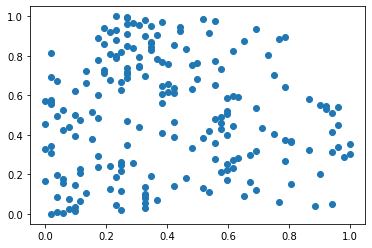

In [42]:

plt.scatter(df.Age,df['CustomerID'])

In [43]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','CustomerID']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [44]:
df['cluster']=y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,2,0.019231,15,39,1
1,0.005025,2,0.057692,15,81,1
2,0.010050,2,0.038462,16,6,1
3,0.015075,2,0.096154,16,77,1
4,0.020101,2,0.250000,17,40,1


In [45]:
km.cluster_centers_

array([[0.34444985, 0.80173017],
       [0.16656328, 0.24866267],
       [0.72294654, 0.36010561]])

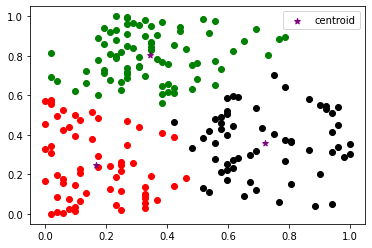

In [47]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['CustomerID'],color='green')
plt.scatter(df2.Age,df2['CustomerID'],color='red')
plt.scatter(df3.Age,df3['CustomerID'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**Elbow Plot**

In [48]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','CustomerID']])
    sse.append(km.inertia_)

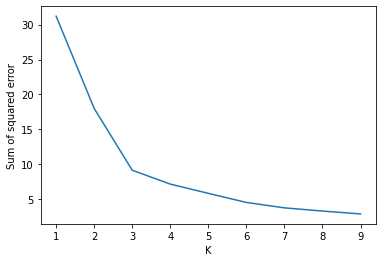

In [49]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
     